In [13]:
import pymysql.cursors
import pandas as pd

conn = pymysql.connect(host='172.20.95.116', user='emily0', password='1234',
                       db='leisure', charset='utf8')

curs = conn.cursor()

In [ ]:
cur = conn.cursor(pymysql.cursors.DictCursor)
query = """
select p.year, p.전국 as 공연수, e.전국 as 고용률
from performance_count as p
	inner join employment_data as e on p.year = e.year
"""
cur.execute(query)
rows = cur.fetchall() 
result_df = pd.DataFrame(rows) 
print(result_df)
cur.close()
conn.close()

   year     공연수   고용률
0  2015   3,512  60.5
1  2016   4,044  60.6
2  2017   6,067  60.8
3  2018   5,119  60.7
4  2019  12,066  60.9
5  2020   6,242  60.1
6  2021  12,474  60.5
7  2022  17,920  62.1
8  2023  20,386  62.6
9  2024  21,538  62.7


In [15]:
print(result_df[result_df['year'] == 2015])

   year    공연수   고용률
0  2015  3,512  60.5


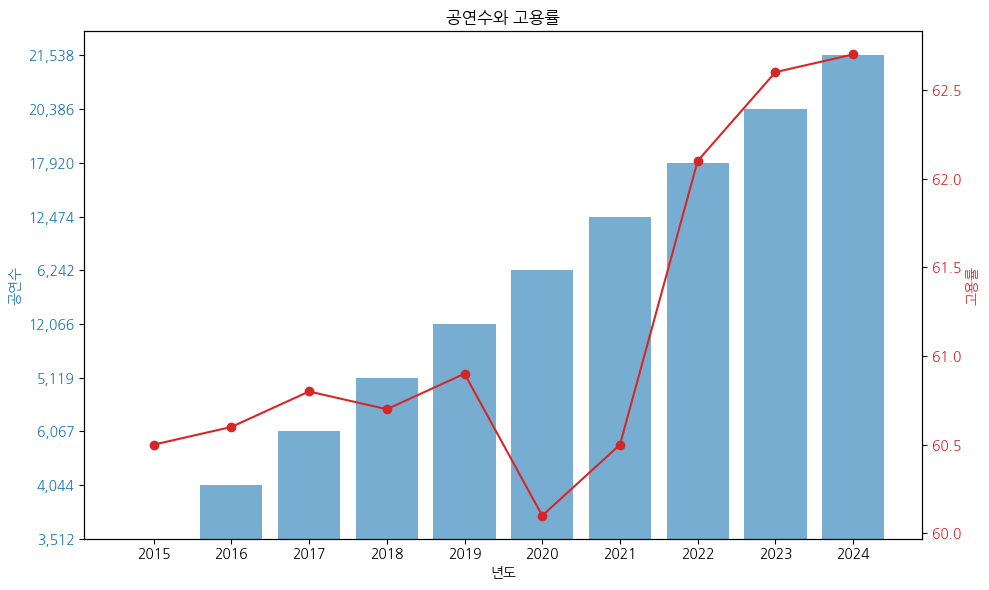

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

fig, ax1 = plt.subplots(figsize=(10, 6)) 

# 공연수 시각화 (왼쪽 y축)
ax1.set_xlabel('년도')
ax1.set_ylabel('공연수', color='tab:blue')
ax1.bar(result_df['year'], result_df['공연수'], color='tab:blue', alpha=0.6, label='공연수')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 고용률 시각화 (오른쪽 y축)
ax2 = ax1.twinx() 
ax2.set_ylabel('고용률', color='tab:red')
ax2.plot(result_df['year'], result_df['고용률'], color='tab:red', marker='o', label='고용률')
ax2.tick_params(axis='y', labelcolor='tab:red')

# x축 레이블 회전
ax1.set_xticks(result_df['year'])
ax1.set_xticklabels(result_df['year'])

# 제목 설정
plt.title('공연수와 고용률')
fig.tight_layout() 
plt.show()

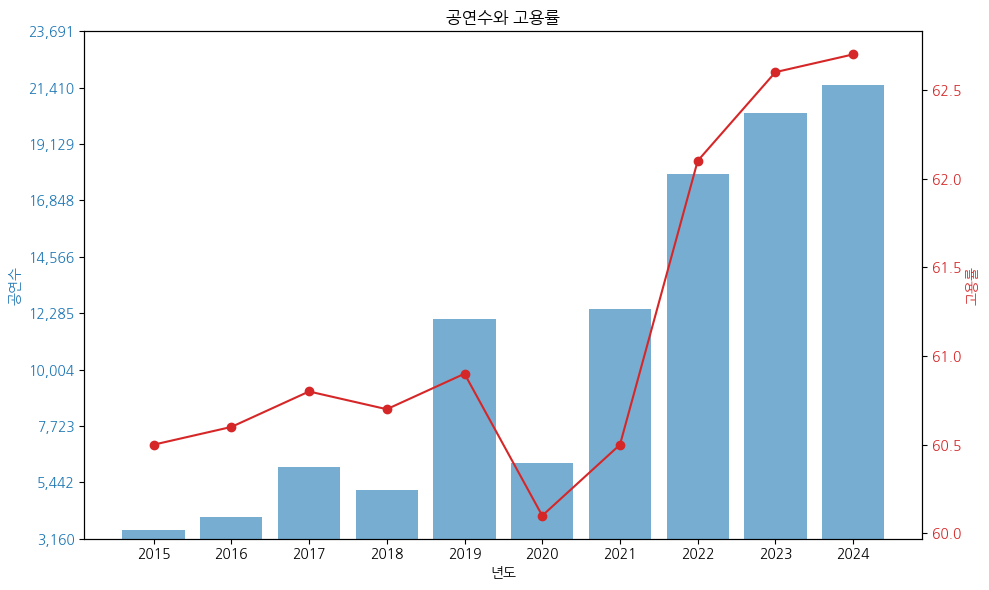

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

fig, ax1 = plt.subplots(figsize=(10, 6)) 

# 데이터 변환: 쉼표(,) 제거 후 숫자로 변환 (오류 방지)
result_df['공연수'] = result_df['공연수'].astype(str).str.replace(',', '').astype(float)

# 공연수 시각화 (왼쪽 y축)
ax1.set_xlabel('년도')
ax1.set_ylabel('공연수', color='tab:blue')
ax1.bar(result_df['year'], result_df['공연수'], color='tab:blue', alpha=0.6, label='공연수')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# y축 범위 및 정렬된 눈금 설정
y_min = min(result_df['공연수']) * 0.9  # 
y_max = max(result_df['공연수']) * 1.1  
ax1.set_ylim(3512, 21538)  
ax1.set_yticks(np.linspace(y_min, y_max,num=10))  

# y축 숫자를 보기 쉽게 포맷 (예: 1,000 단위 쉼표 추가)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))

# 고용률 시각화 (오른쪽 y축)
ax2 = ax1.twinx() 
ax2.set_ylabel('고용률', color='tab:red')
ax2.plot(result_df['year'], result_df['고용률'], color='tab:red', marker='o', label='고용률')
ax2.tick_params(axis='y', labelcolor='tab:red')

# x축 레이블 설정
ax1.set_xticks(result_df['year'])
ax1.set_xticklabels(result_df['year'])

# 제목 설정
plt.title('공연수와 고용률')
fig.tight_layout()  
plt.show()
